# ECG Lab


**Part 1:**
Reading CSV File




In [1]:
import pandas as pd

In [5]:
data= pd.read_csv("/samples.csv")

In [6]:
data

,'Elapsed time','ECG I','ECG I filtered'
0,'hh:mm:ss.mmm','mV','mV'
1,'0:00.000',-0.085,-0.115
2,'0:00.002',-0.08,-0.115
3,'0:00.004',-0.07,-0.12
4,'0:00.006',-0.075,-0.12
...,...,...,...
4996,'0:09.990',0.015,0.095
4997,'0:09.992',0.03,0.095
4998,'0:09.994',0.02,0.095
4999,'0:09.996',0.035,0.095


**Part 2**: Data Engineering

In [7]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
#Skip first row

In [9]:
data= pd.read_csv("/samples.csv", skiprows=[0])

In [10]:
data

,'hh:mm:ss.mmm','mV','mV'.1
0,'0:00.000',-0.085,-0.115
1,'0:00.002',-0.080,-0.115
2,'0:00.004',-0.070,-0.120
3,'0:00.006',-0.075,-0.120
4,'0:00.008',-0.095,-0.120
...,...,...,...
4995,'0:09.990',0.015,0.095
4996,'0:09.992',0.030,0.095
4997,'0:09.994',0.020,0.095
4998,'0:09.996',0.035,0.095


In [11]:
#rename columns
data = data.rename(columns = {data.columns[0]:"Time"	,data.columns[1]:"ECG",data.columns[2]:"ECGFiltered"})

In [12]:
data

,Time,ECG,ECGFiltered
0,'0:00.000',-0.085,-0.115
1,'0:00.002',-0.080,-0.115
2,'0:00.004',-0.070,-0.120
3,'0:00.006',-0.075,-0.120
4,'0:00.008',-0.095,-0.120
...,...,...,...
4995,'0:09.990',0.015,0.095
4996,'0:09.992',0.030,0.095
4997,'0:09.994',0.020,0.095
4998,'0:09.996',0.035,0.095


In [13]:
data.Time

,Time
0,'0:00.000'
1,'0:00.002'
2,'0:00.004'
3,'0:00.006'
4,'0:00.008'
...,...
4995,'0:09.990'
4996,'0:09.992'
4997,'0:09.994'
4998,'0:09.996'


In [14]:
#PLot Data
import matplotlib.pyplot  as plt

In [15]:

type(data.Time)

pandas.core.series.Series

In [16]:
type(data.Time[0])

str

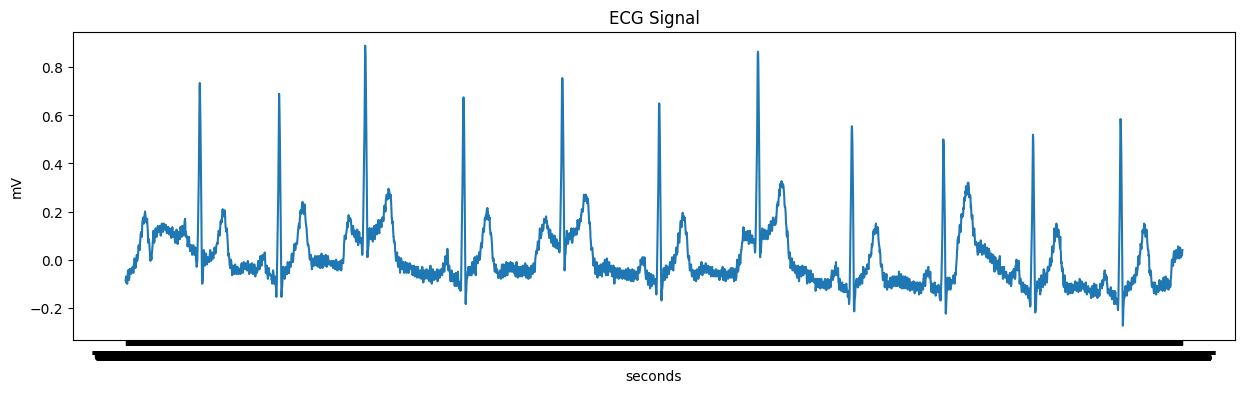

In [17]:
#plot original signal
fig = plt.figure(figsize=(15,4))
figure_details = fig.add_subplot()
figure_details.set_ylabel('mV')
figure_details.set_xlabel('seconds')
figure_details.set_title('ECG Signal')
figure_details.plot(data.Time,data.ECG)
plt.show()

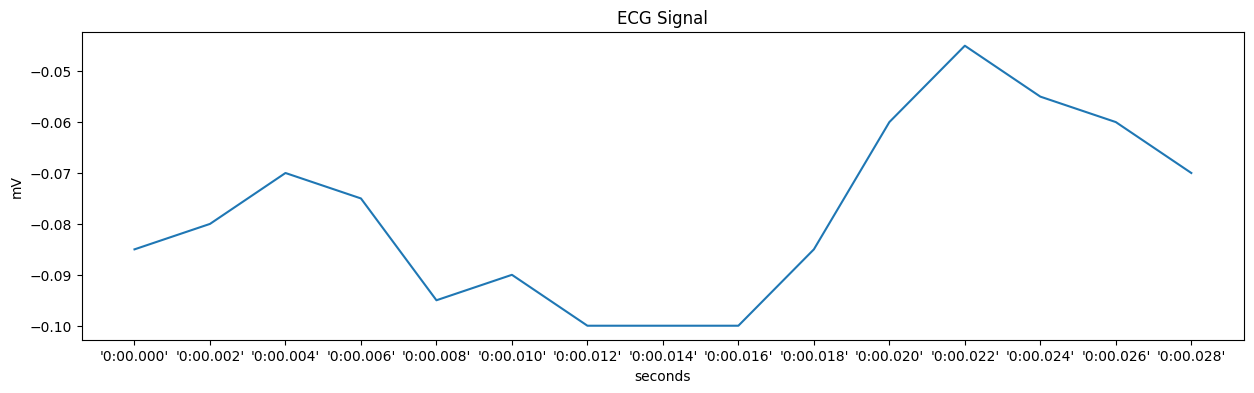

In [18]:
#plot original signal [zoom in]
fig = plt.figure(figsize=(15,4))
figure_details = fig.add_subplot()
figure_details.set_ylabel('mV')
figure_details.set_xlabel('seconds')
figure_details.set_title('ECG Signal')
figure_details.plot(data.Time[0:15],data.ECG[0:15])
plt.show()

In [19]:
#determine sapling rate by observation delta t= 0.002 => fs= 1/0.002= 500 hz
fs= 500

In [20]:
#first way to change time axis
## generate time using numpy array
import numpy as np

In [21]:
time= np.arange(0,10, 0.002)

In [22]:
time

array([0.000e+00, 2.000e-03, 4.000e-03, ..., 9.994e+00, 9.996e+00,
       9.998e+00])

In [23]:
#second way to change time axis
## modify orginal time column

In [24]:
print(data.Time[0].split(":"))

["'0", "00.000'"]


In [25]:
time2=data.Time.map(lambda x: x.replace("'", ""))

In [26]:
type(time2[0])

str

In [27]:
time2[0].split(":")

['0', '00.000']

In [28]:
time3=time2.map(lambda x:x.split(":"))

In [29]:
time3

,Time
0,"[0, 00.000]"
1,"[0, 00.002]"
2,"[0, 00.004]"
3,"[0, 00.006]"
4,"[0, 00.008]"
...,...
4995,"[0, 09.990]"
4996,"[0, 09.992]"
4997,"[0, 09.994]"
4998,"[0, 09.996]"


In [30]:
time4 = time3.map(lambda x:x[1])

In [31]:
time4

,Time
0,00.000
1,00.002
2,00.004
3,00.006
4,00.008
...,...
4995,09.990
4996,09.992
4997,09.994
4998,09.996


In [32]:
type(time4[0])

str

In [35]:
time5= time4.map(lambda x:float(x))

In [36]:
time5

,Time
0,0.000
1,0.002
2,0.004
3,0.006
4,0.008
...,...
4995,9.990
4996,9.992
4997,9.994
4998,9.996


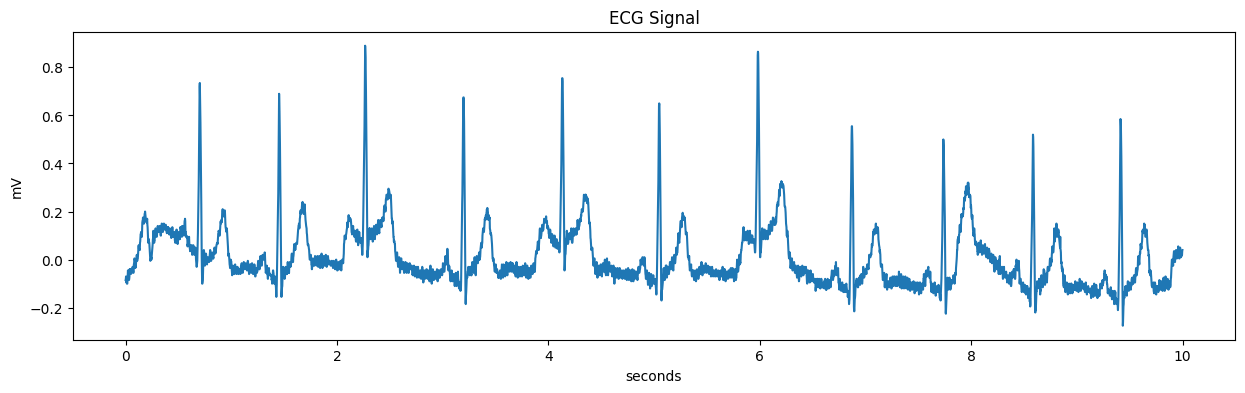

In [37]:
#plot original signal using 1st way
fig = plt.figure(figsize=(15,4))
figure_details = fig.add_subplot()
figure_details.set_ylabel('mV')
figure_details.set_xlabel('seconds')
figure_details.set_title('ECG Signal')
figure_details.plot(time,data.ECG)
plt.show()

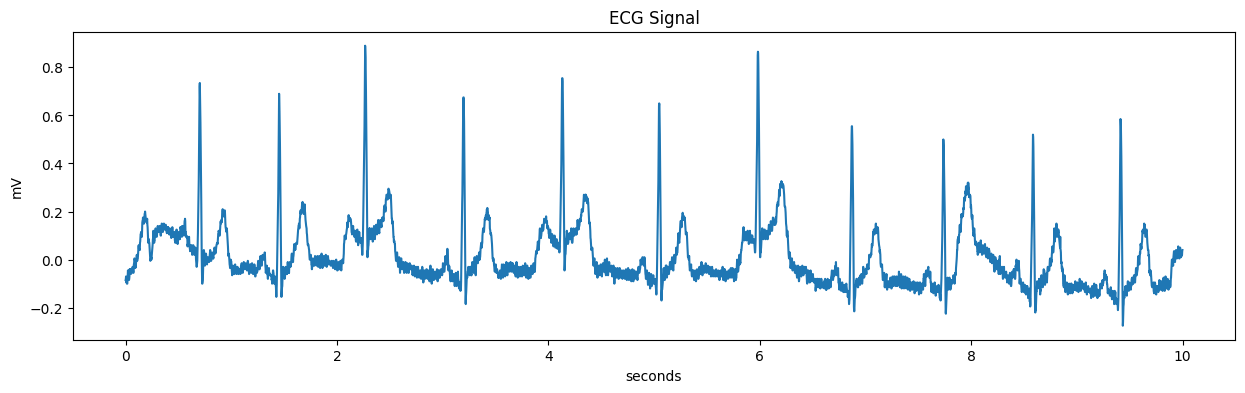

In [38]:
#plot original signal 2nd way
fig = plt.figure(figsize=(15,4))
figure_details = fig.add_subplot()
figure_details.set_ylabel('mV')
figure_details.set_xlabel('seconds')
figure_details.set_title('ECG Signal')
figure_details.plot(time5,data.ECG)
plt.show()

**Part 3**: Creating a Dummy Window    

In [39]:
# create 2 varibles window_start , window_end [default window] we took a sample every 0.002 second => at one second we have 500 samples
window_start=0
window_end=fs  #1sec

In [40]:
window_end

500

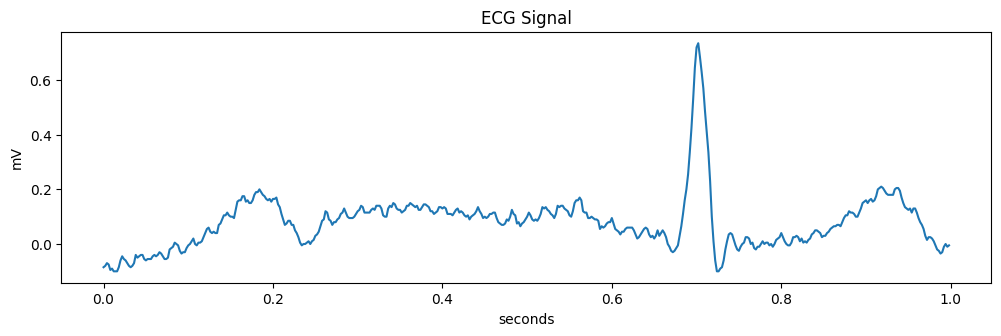

In [41]:
#plot first second samples
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(top=0.8)
figure_details = fig.add_subplot(211)
figure_details.set_ylabel('mV')
figure_details.set_xlabel('seconds')
figure_details.set_title('ECG Signal')
figure_details.plot(time[window_start:window_end] ,data.ECG[window_start:window_end])# [0:500] exlusive 0:499
plt.show()

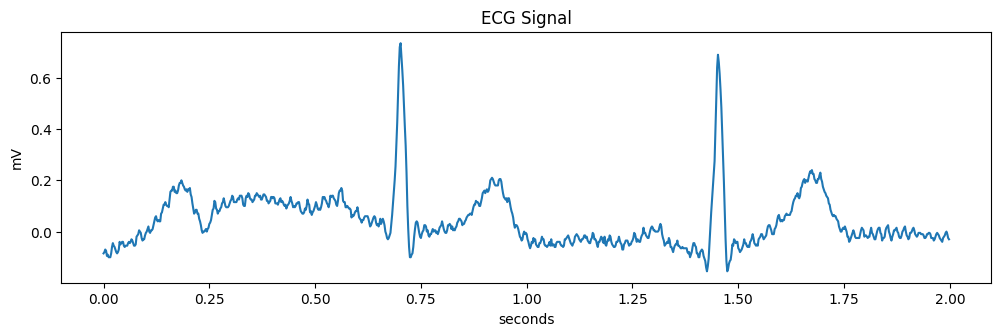

In [42]:
#plot first 2 seconds samples
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(top=0.8)
figure_details = fig.add_subplot(211)
figure_details.set_ylabel('mV')
figure_details.set_xlabel('seconds')
figure_details.set_title('ECG Signal')
figure_details.plot(time[window_start:2*window_end] ,data.ECG[window_start:2*window_end])
plt.show()

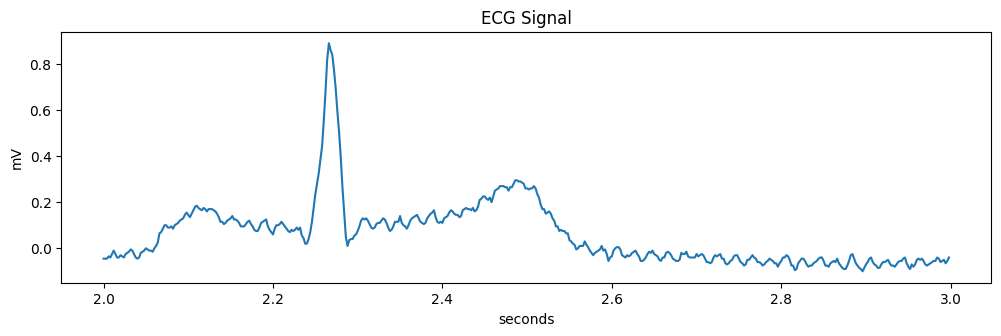

In [43]:
#plot third second samples
#change window_start
window_start= 2*window_end
window_end= 3*window_end
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(top=0.8)
figure_details = fig.add_subplot(211)
figure_details.set_ylabel('mV')
figure_details.set_xlabel('seconds')
figure_details.set_title('ECG Signal')
figure_details.plot(time[window_start:window_end] ,data.ECG[window_start:window_end])
plt.show()

Q1: Creat a function that takes secondNumber, windowSize, and smaplingRate then returns a tuple of windowStart, windowEnd

Examples:


*    Case1 show the 4th second
*    Case2 show the half of the 4th second
*    Case3 show the last 2 seconds

<hr>Case1: input: 4, 1sec, 500HZ
output: (1500, 2000)

<hr>Case2: input: 4, 0.5 sec, 500HZ
output: (1500, 1750)

<hr>Case3: input: 9, 2 sec, 500HZ
output: (4000 ,5000)




In [44]:
def getwindowBorders(secondNumber, windowSize, samplingRate):
  #writ your code
    window_start=(secondNumber-1)*samplingRate
    x=windowSize*samplingRate
    window_End=window_start+x
    return window_start,window_End
    pass

1500 2000


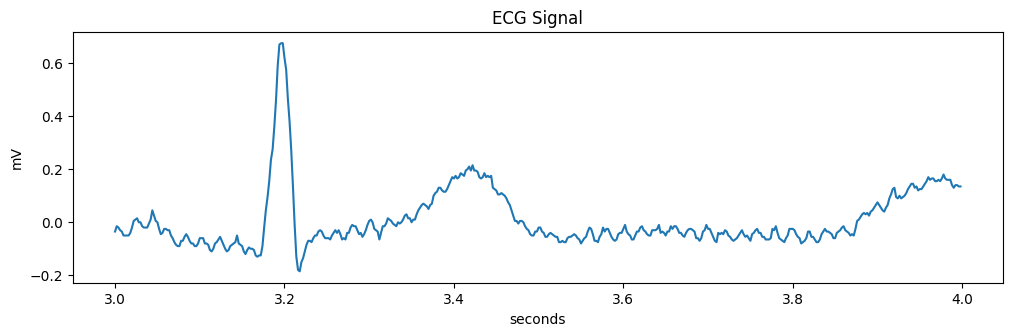

In [45]:
#Compare Your Result
#Case 1
fs=500
window_start,window_End= getwindowBorders(4,1,fs)
print(window_start,window_End)
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(top=0.8)
figure_details = fig.add_subplot(211)
figure_details.set_ylabel('mV')
figure_details.set_xlabel('seconds')
figure_details.set_title('ECG Signal')
figure_details.plot(time[window_start:window_End] ,data.ECG[window_start:window_End])
plt.show()

1500 1750.0


TypeError: slice indices must be integers or None or have an __index__ method

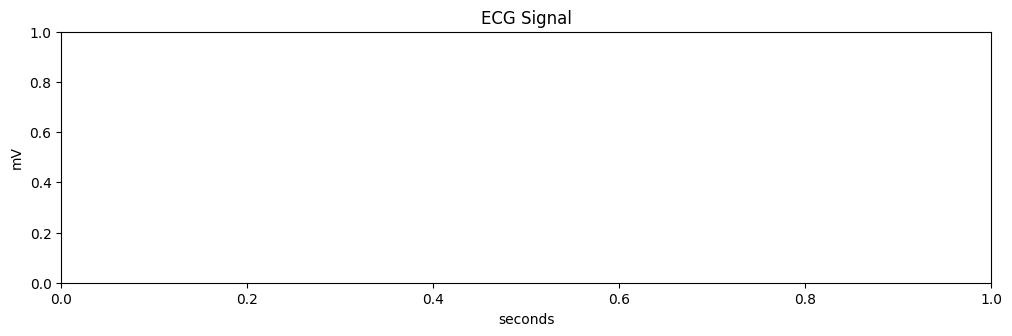

In [46]:
#Compare Your Result
#Case 2
window_start,window_End= getwindowBorders(4,0.5,fs)
print(window_start,window_End)
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(top=0.8)
figure_details = fig.add_subplot(211)
figure_details.set_ylabel('mV')
figure_details.set_xlabel('seconds')
figure_details.set_title('ECG Signal')
figure_details.plot(time[window_start:window_End] ,data.ECG[window_start:window_End])
plt.show()

4000 5000


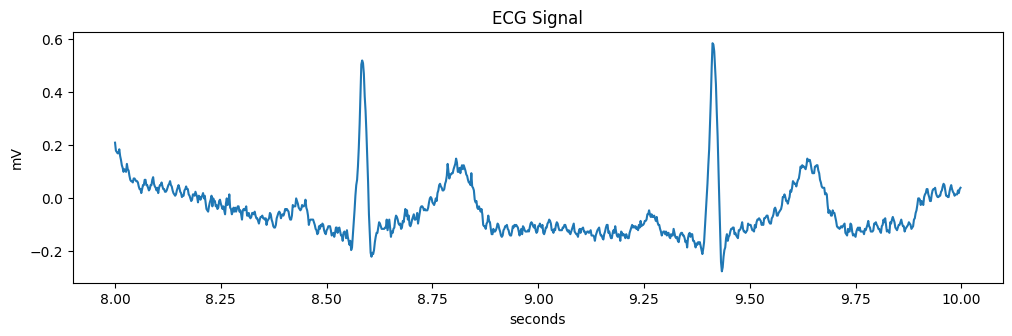

In [47]:
#Compare Your Result
#Case 3
window_start,window_End= getwindowBorders(9,2,fs)
print(window_start,window_End)
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(top=0.8)
figure_details = fig.add_subplot(211)
figure_details.set_ylabel('mV')
figure_details.set_xlabel('seconds')
figure_details.set_title('ECG Signal')
figure_details.plot(time[window_start:window_End] ,data.ECG[window_start:window_End])
plt.show()

**Part 4:** HeartPy Library

In [48]:
!pip install heartpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.6 MB/s eta 0:00:00


In [49]:
import heartpy as hp

In [50]:
#applying low pass filter in order to attenuate frequincies above 50 hz
filteredSignal = hp.filter_signal(data.ECG, cutoff =10, sample_rate = fs, order = 1, filtertype='lowpass')

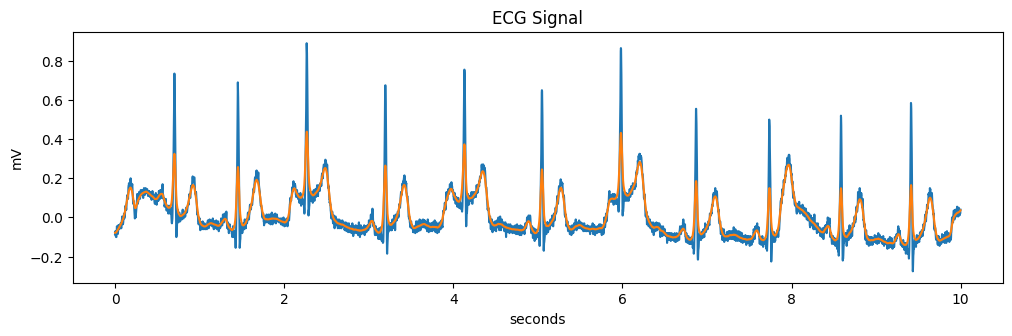

In [51]:
#plot and compare orginal signal to filtered signal

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(top=0.8)
figure_details = fig.add_subplot(211)
figure_details.set_ylabel('mV')
figure_details.set_xlabel('seconds')
figure_details.set_title('ECG Signal')
figure_details.plot(time,data.ECG)
figure_details.plot(time,filteredSignal)
plt.show()

Q2: Apply a notch filter to the ECG signal to supress 0.05Hz frequency then show your result by plotting as above <br>
Note: this frequency may be due to respiration or the motion of the patients or the instruments.

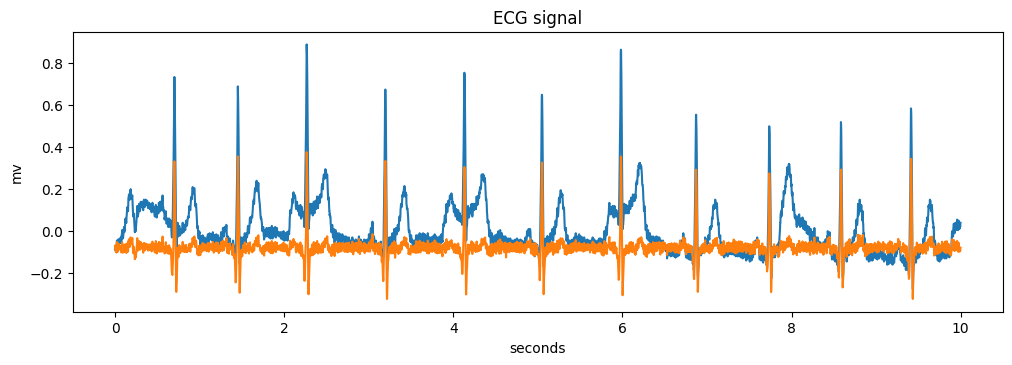

In [53]:
# Write your Code
import pandas as pd
data= pd.read_csv("/samples.csv")
data= pd.read_csv("/samples.csv", skiprows=[0])
data = data.rename(columns = {data.columns[0]:"Time",data.columns[1]:"ECG",data.columns[2]:"ECGFiltered"})
import matplotlib.pyplot  as plt
import numpy as np
time= np.arange(0,10, 0.002)
time2=data.Time.map(lambda x: x.replace("'", ""))
time3=time2.map(lambda x:x.split(":"))
time4 = time3.map(lambda x:x[1])
time5= time4.map(lambda x:float(x))
import heartpy as hp
newfilteredsignal=hp.filter_signal(data.ECG, cutoff = 0.05, sample_rate = 500.0, filtertype='notch')
fig=plt.figure(figsize=(12,8))
figure_details= fig.add_subplot(211)
figure_details.set_ylabel('mv')
figure_details.set_xlabel('seconds')
figure_details.set_title('ECG signal')
figure_details.plot(time,data.ECG)
figure_details.plot(time,newfilteredsignal)
plt.show()

Q3: Apply high pass filter to attenuate frequencies below 15 hz and show your result

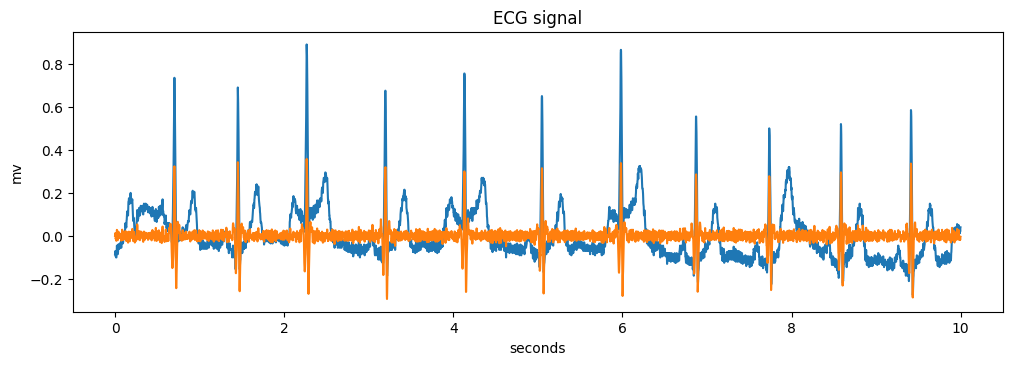

In [55]:
import pandas as pd
data= pd.read_csv("/samples.csv")
data= pd.read_csv("/samples.csv", skiprows=[0])
data = data.rename(columns = {data.columns[0]:"Time"	,data.columns[1]:"ECG",data.columns[2]:"ECGFiltered"})

import numpy as np
time= np.arange(0,10, 0.002)
time2=data.Time.map(lambda x: x.replace("'", ""))
time3=time2.map(lambda x:x.split(":"))
time4 = time3.map(lambda x:x[1])
time5= time4.map(lambda x:float(x))
import heartpy as hp
new_filteredsignal =hp.filter_signal(data.ECG, cutoff = 15, sample_rate = 500.0, order = 3, filtertype='highpass')
import matplotlib.pyplot  as plt
fig=plt.figure(figsize=(12,8))
figure_details= fig.add_subplot(211)
figure_details.set_ylabel('mv')
figure_details.set_xlabel('seconds')
figure_details.set_title('ECG signal')
figure_details.plot(time,data.ECG)
figure_details.plot(time,new_filteredsignal)
plt.show()


Q4: Apply a smoothing filter to the ECG signal then show your result <br>




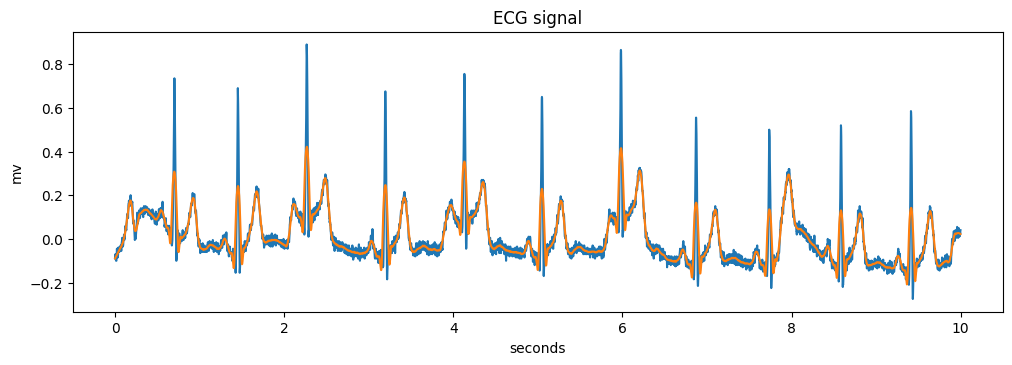

In [57]:
#write your Code
import pandas as pd
data= pd.read_csv("/samples.csv")
data= pd.read_csv("/samples.csv", skiprows=[0])
data = data.rename(columns = {data.columns[0]:"Time"	,data.columns[1]:"ECG",data.columns[2]:"ECGFiltered"})

import numpy as np
time= np.arange(0,10, 0.002)
time2=data.Time.map(lambda x: x.replace("'", ""))
time3=time2.map(lambda x:x.split(":"))
time4 = time3.map(lambda x:x[1])
time5= time4.map(lambda x:float(x))
import heartpy as hp
new_filteredsignal_1 =hp.smooth_signal(data.ECG,sample_rate=500,window_length=50,polyorder=2)
import matplotlib.pyplot  as plt
fig=plt.figure(figsize=(12,8))
figure_details= fig.add_subplot(211)
figure_details.set_ylabel('mv')
figure_details.set_xlabel('seconds')
figure_details.set_title('ECG signal')
figure_details.plot(time,data.ECG)
figure_details.plot(time,new_filteredsignal_1)
plt.show()

bpm: 68.886338
ibi: 871.000000
sdnn: 58.557664
sdsd: 33.138691
rmssd: 48.767020
pnn20: 0.444444
pnn50: 0.222222
hr_mad: 51.000000
sd1: 33.934578
sd2: 66.578089
s: 7097.798198
sd1/sd2: 0.509696
breathingrate: 0.114811


<Figure size 2000x400 with 0 Axes>

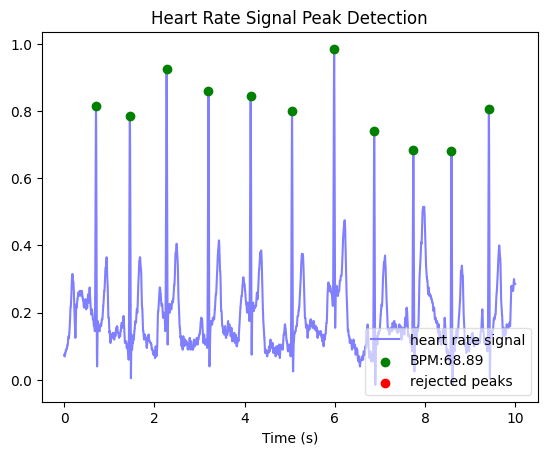

In [58]:
#Calculted measures
wd, m = hp.process(data.ECGFiltered,fs)

plt.figure(figsize=(20,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

Q5: Calaculate the following from Data.ECG

In [59]:
#find the maximum value using numpy library
import numpy
maximum_value = numpy.max(data.ECG)
print(maximum_value)


0.89


In [95]:
#implement a function that returns the maximum value then compare your result with numpy library
import pandas as pd
data= pd.read_csv("/samples.csv")
data= pd.read_csv("/samples.csv", skiprows=[0])
data = data.rename(columns = {data.columns[0]:"Time"	,data.columns[1]:"ECG",data.columns[2]:"ECGFiltered"})

import numpy as np
time= np.arange(0,10, 0.002)
time2=data.Time.map(lambda x: x.replace("'", ""))
time3=time2.map(lambda x:x.split(":"))
time4 = time3.map(lambda x:x[1])
time5= time4.map(lambda x:float(x))

# df = pd.DataFrame(data [data.columns[0]:"Time",data.columns[1]:"ECG",data.columns[2]:"ECGFiltered"})

# data = pd.read_csv('/samples.csv')
data.dropna(inplace=True)
shows = pd.DataFrame(data['ECG'].head())

shows.sort_values(by=['ECG'])

lgtlength = shows['ECG'].idxmax()

max_value = shows.loc[lgtlength, 'ECG']

print("The Largest Number in smtlgtarr Numpy Array = ", max_value)


The Largest Number in smtlgtarr Numpy Array =  -0.07


In [96]:
data['ECG']

,ECG
0,-0.085
1,-0.080
2,-0.070
3,-0.075
4,-0.095
...,...
4995,0.015
4996,0.030
4997,0.020
4998,0.035


In [97]:
#find the minimum value using numpy library
import numpy
minimum_value = numpy.min(data.ECG)
print(minimum_value)

-0.275


In [106]:
#implement a function that returns the minimum value then compare your result with numpy library

import pandas as pd
data= pd.read_csv("/samples.csv")
data= pd.read_csv("/samples.csv", skiprows=[0])
data = data.rename(columns = {data.columns[0]:"Time"	,data.columns[1]:"ECG",data.columns[2]:"ECGFiltered"})

import numpy as np
time= np.arange(0,10, 0.002)
time2=data.Time.map(lambda x: x.replace("'", ""))
time3=time2.map(lambda x:x.split(":"))
time4 = time3.map(lambda x:x[1])
time5= time4.map(lambda x:float(x))

#df = pd.DataFrame(data [data.columns[0]:"Time",data.columns[1]:"ECG",data.columns[2]:"ECGFiltered"})

# data = pd.read_csv('/samples.csv')
data.dropna(inplace=True)
shows = pd.DataFrame(data['ECG'].head())

shows.sort_values(by=['ECG'])

min_value = shows['ECG'].iloc[0]
print("The Smallest Number in smtlgtarr Numpy Array = ", min_value)

The Smallest Number in smtlgtarr Numpy Array =  -0.085


In [108]:
#find the mean using numpy library
import numpy
mean_value = numpy.mean(data.ECG)
print(mean_value)

0.009123999999999998


In [114]:
#implement a function that returns the mean then compare your result with numpy library
import pandas as pd
data= pd.read_csv("/samples.csv")
#implement a function that returns the mean then compare your result with numpy library
import pandas as pd
data= pd.read_csv("/samples.csv")
data= pd.read_csv("/samples.csv", skiprows=[0])
data = data.rename(columns = {data.columns[0]:"Time"	,data.columns[1]:"ECG",data.columns[2]:"ECGFiltered"})
def calculate_mean(data):
    total_sum = sum(data['ECG'])
    num_elements = len(data['ECG'])
    mean = total_sum / num_elements
    return mean
calculate_mean(data)

0.009123999999999868

In [115]:
#Calculate the median using numpy library
import numpy
median_value = numpy.median(data.ECG)
print(median_value)

-0.03


In [117]:
#implement a function that returns the median then compare your result with numpy library
def calculate_median(data):
    """
    Calculates the median of a list of numbers.
    """
    # Sort the data:
    sorted_data = sorted(data)

    # Get the length of the data:
    n = len(sorted_data)

    # Calculate the median:
    if n % 2 == 0:
        # If the length of the data is even, the median is the average of the two middle values
        mid1 = sorted_data[n // 2 - 1]
        mid2 = sorted_data[n // 2]
        median = (mid1 + mid2) / 2
    else:
        # If the length of the data is odd, the median is the middle value
        median = sorted_data[n // 2]

    return median

# Calculate the median using the custom function
custom_median = calculate_median(data['ECG'])

# Calculate the median using NumPy
numpy_median = np.median(data['ECG'])

# Compare the results
print("Median calculated using custom function:", custom_median)
print("Median calculated using NumPy:", numpy_median)

calculate_median(data)

Median calculated using custom function: -0.03
Median calculated using NumPy: -0.03


'ECGFiltered'